In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the Fashion MNIST Dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Printing the shape of data to see the number of samples in training data

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [4]:
# Printing the shape of data to see the number of samples in testing data

print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [5]:
# Splitting the training data into the training and validation data. We are usig the validation data to work on the neural network parameters
# Printing the shape of data to see the number of samples in testing data

x_val, y_val = x_train[0:15000], y_train[0:15000]
print("x_val shape:", x_val.shape, "y_val shape:", y_val.shape)

x_val shape: (15000, 28, 28) y_val shape: (15000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

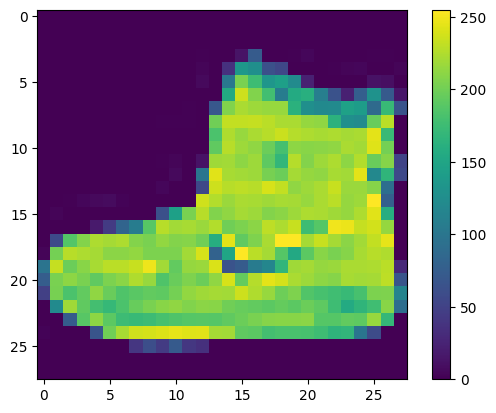

In [7]:
# Show one of the images from the training dataset
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

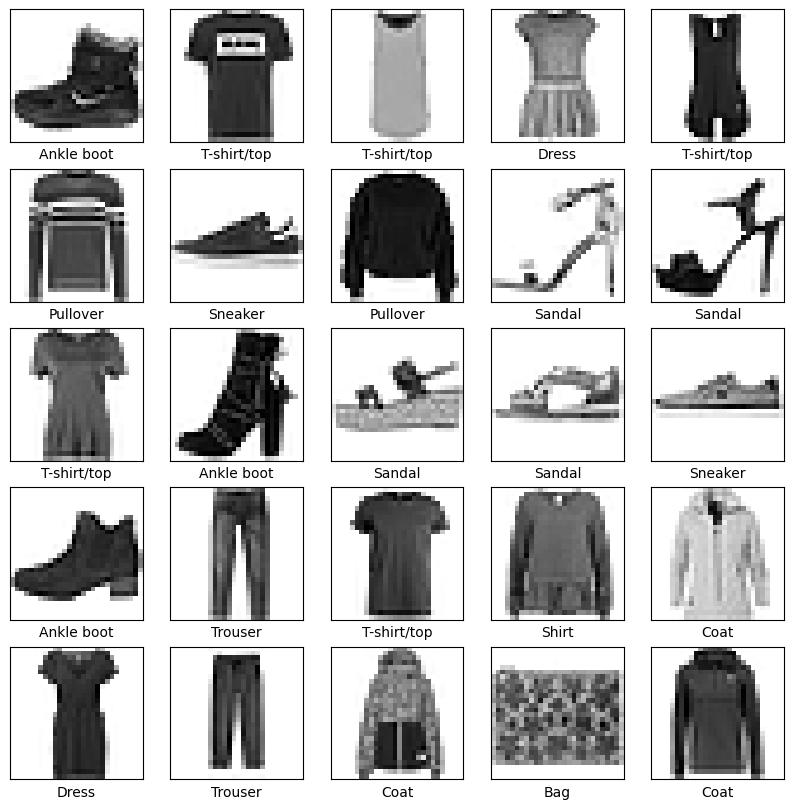

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### PCA Analysis

In [10]:
train_images = np.reshape(x_train,(60000,784))

In [11]:
import pandas as pd
dataf = pd.DataFrame(train_images)

In [12]:
input_data = dataf.iloc[:,:] / 255

In [13]:
print(input_data.head())

   0    1    2    3    4         5    6    7         8         9    ...  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   
1  0.0  0.0  0.0  0.0  0.0  0.000015  0.0  0.0  0.000000  0.000000  ...   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000338  ...   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000507  0.001476  ...   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   

       774       775       776       777  778  779  780  781  782  783  
0  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.00183  0.001753  0.001999  0.001169  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.00000  0.000000  0.000015  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


In [14]:
features = [i for i in range(input_data.shape[1]) ]

In [15]:
pca_df = pd.DataFrame(input_data, columns=features)
pca_df['label'] = y_train

In [16]:
print('Size of the dataframe: {}'.format(pca_df.shape))

Size of the dataframe: (60000, 785)


In [17]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results
pca_df['result'] = results

In [18]:
pca_df['result']

0         Ankle boot
1        T-shirt/top
2        T-shirt/top
3              Dress
4        T-shirt/top
            ...     
59995         Sandal
59996        Trouser
59997          Dress
59998    T-shirt/top
59999         Sandal
Name: result, Length: 60000, dtype: object

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

In [20]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [21]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.2903958  0.17755528 0.06019286]


In [22]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1]
pca_df['Third Dimension'] = pca_result[:,2]

In [23]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,779,780,781,782,783,label,result,First Dimension,Second Dimension,Third Dimension
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,9,Ankle boot,-0.001907,0.025114,-0.018624
1,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top,0.021652,-0.006945,-0.004014
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000338,...,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top,-0.011164,-0.016945,0.001633
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000507,0.001476,...,0.0,0.0,0.0,0.0,0.0,3,Dress,0.000483,-0.015088,0.003116
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top,0.012366,-0.018472,-0.011447


Text(0.5, 0.98, '3-Component PCA')

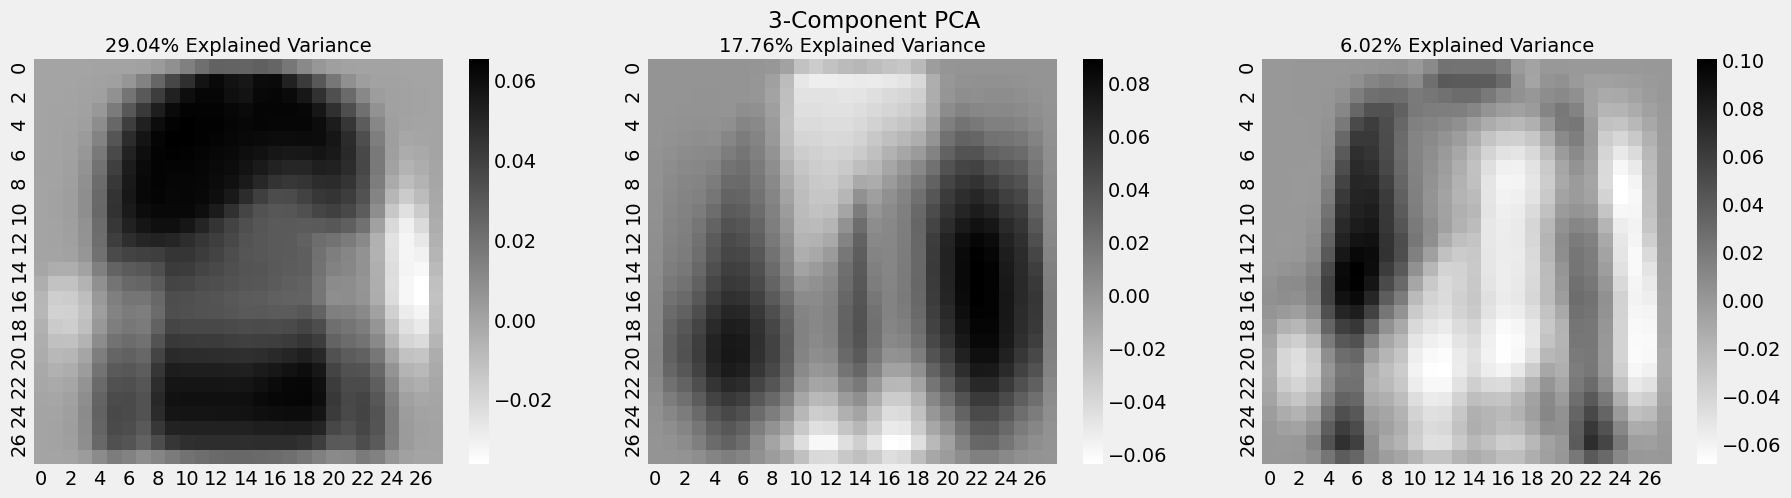

In [24]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
# Add picture title
plt.suptitle('3-Component PCA')

<Axes: xlabel='First Dimension', ylabel='Second Dimension'>

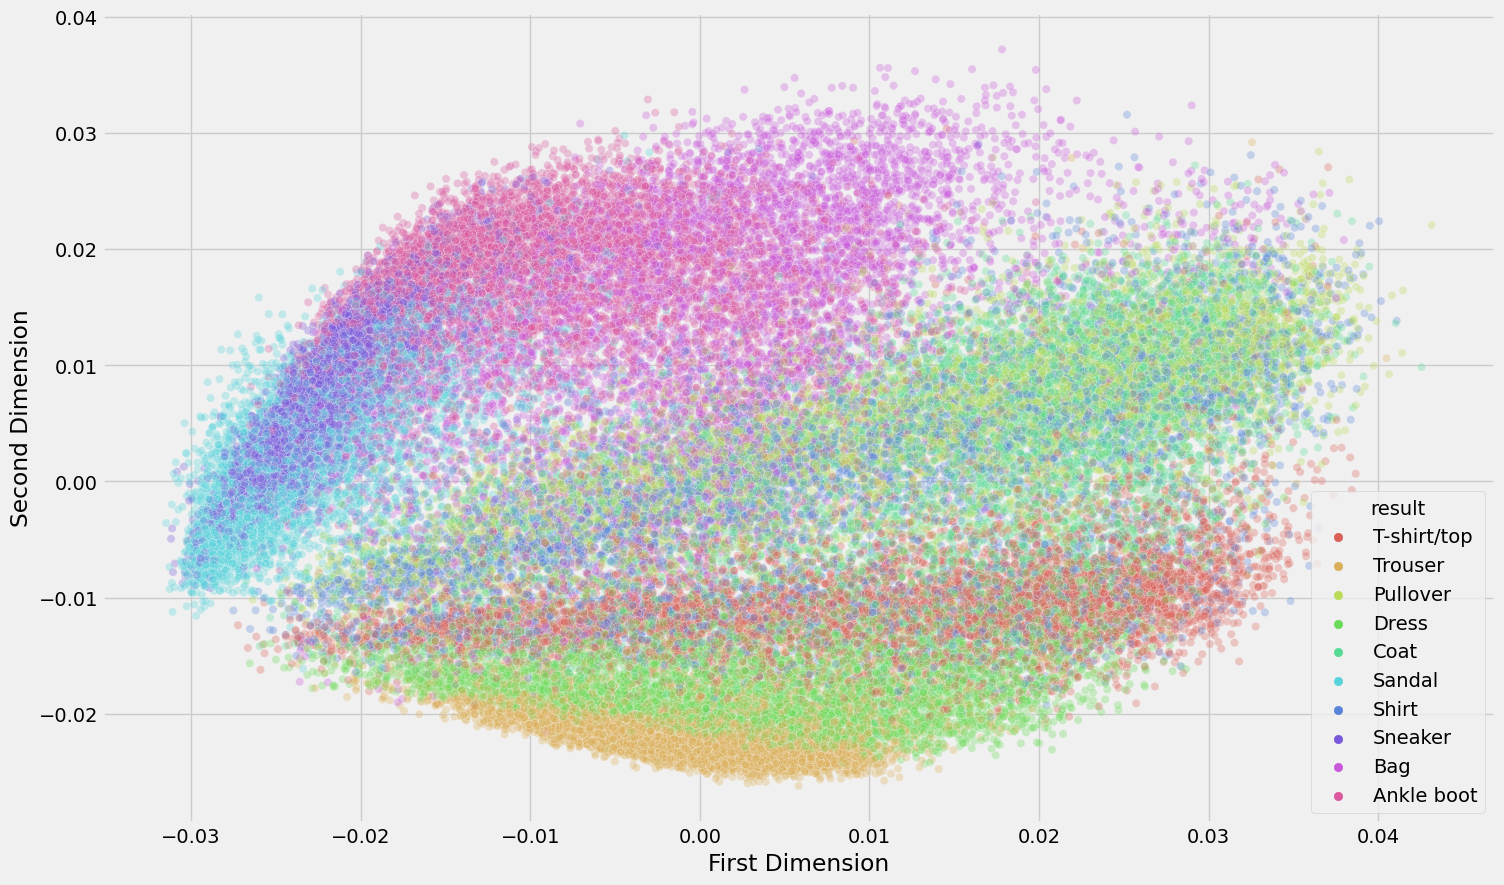

In [25]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

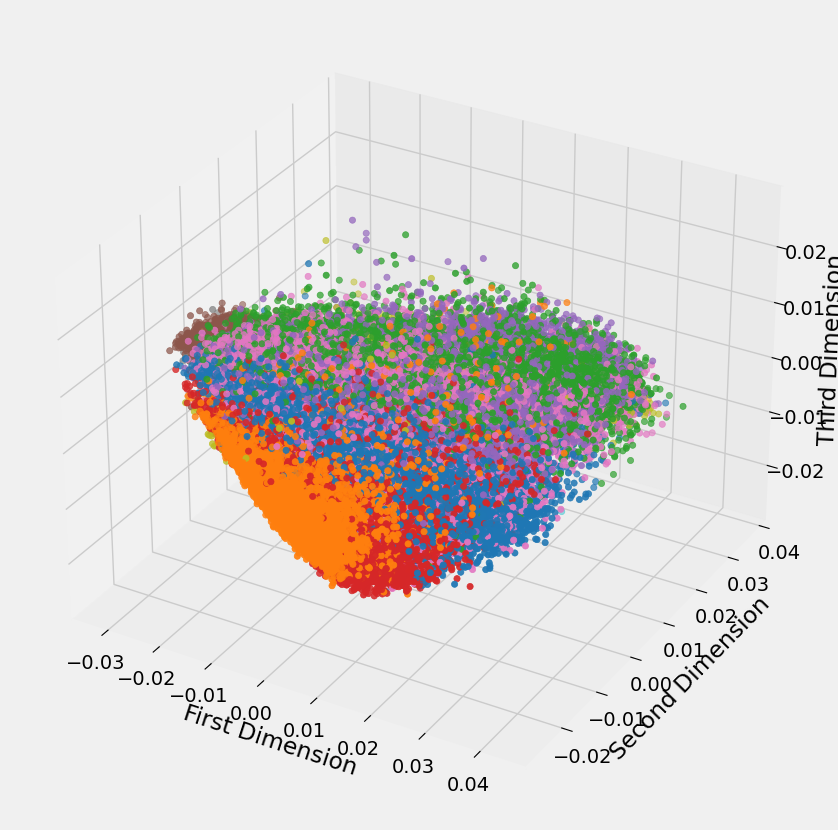

In [26]:
graph = plt.figure(figsize=(16,10)).add_subplot(projection = '3d')
graph.scatter(
    xs=pca_df["First Dimension"],
    ys=pca_df["Second Dimension"],
    zs=pca_df["Third Dimension"],
    c=pca_df["label"],
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Input transformation pipeline

In [27]:
import numpy as np
import cv2
import random

# Define functions for transformations

def mirror_image(image):
    return np.fliplr(image)

def rotate_image(image, angle):
    return np.rot90(image, k=angle // 90)

def random_crop(image, crop_size):
    height, width = image.shape
    top = random.randint(0, height - crop_size)
    left = random.randint(0, width - crop_size)
    return image[top:top+crop_size, left:left+crop_size]

# Apply transformations to the validation dataset
transformed_x_val = []

for img in x_val:
    # Apply mirroring with 50% probability
    if random.random() > 0.5:
        img = mirror_image(img)

    # Apply rotation with random angle between -30 and 30 degrees
    rotation_angle = random.randint(-30, 30)
    img = rotate_image(img, rotation_angle)

    # Apply random cropping with random crop size between 20 and 28 pixels
    crop_size = random.randint(20, 28)
    img = random_crop(img, crop_size)

    transformed_x_val.append(img)

# Convert the list of transformed images back to a NumPy array
transformed_x_val = np.array(transformed_x_val)

# Print the shape of the transformed validation set
print("Shape of the transformed validation set:", transformed_x_val.shape)

Shape of the transformed validation set: (15000,)


<ipython-input-27-04f0b77618ec>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  transformed_x_val = np.array(transformed_x_val)


In [28]:
common_shape = (28, 28)  # Adjust this to your desired shape
resized_transformed_x_val = [cv2.resize(img, common_shape) for img in transformed_x_val]
resized_transformed_x_val = np.array(resized_transformed_x_val)
combined_x_train = np.concatenate((x_train, resized_transformed_x_val), axis=0)
combined_y_train = np.concatenate((y_train, y_val), axis=0)

# Print the shape of the combined dataset and labels
print("Shape of the combined_x_train:", combined_x_train.shape)
print("Shape of the combined_y_train:", combined_y_train.shape)

Shape of the combined_x_train: (75000, 28, 28)
Shape of the combined_y_train: (75000,)


In [29]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [30]:
normal_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
normal_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

normal = normal_model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[checkpointer])

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.7740 - accuracy: 0.7413
Epoch 1: val_loss improved from inf to 0.65572, saving model to model.weights.best.hdf5
1172/1172 [==============================] - 89s 73ms/step - loss: 0.7740 - accuracy: 0.7413 - val_loss: 0.6557 - val_accuracy: 0.7654
Epoch 2/10
   2/1172 [..............................] - ETA: 1:06 - loss: 0.6290 - accuracy: 0.7656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1172/1172 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.8300
Epoch 2: val_loss improved from 0.65572 to 0.58241, saving model to model.weights.best.hdf5
1172/1172 [==============================] - 90s 77ms/step - loss: 0.4624 - accuracy: 0.8300 - val_loss: 0.5824 - val_accuracy: 0.7949
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.4038 - accuracy: 0.8501
Epoch 3: val_loss did not improve from 0.58241
1172/1172 [==============================] - 85s 73ms/step - loss: 0.4038 - accuracy: 0.8501 - val_loss: 0.6215 - val_accuracy: 0.7980
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8643
Epoch 4: val_loss did not improve from 0.58241
1172/1172 [==============================] - 85s 73ms/step - loss: 0.3629 - accuracy: 0.8643 - val_loss: 0.7841 - val_accuracy: 0.7749
Epoch 5/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3290 - accuracy: 0.8768
Epoch 5: val_loss did not im

In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = normal_model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 10ms/step - loss: 0.2850 - accuracy: 0.8979
Test Loss: 0.2850
Test Accuracy: 89.79%


In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
938/938 [==============================] - 78s 82ms/step - loss: 0.5982 - accuracy: 0.7795 - val_loss: 40.0436 - val_accuracy: 0.8603
Epoch 2/10
938/938 [==============================] - 76s 81ms/step - loss: 0.4091 - accuracy: 0.8512 - val_loss: 30.3527 - val_accuracy: 0.8831
Epoch 3/10
938/938 [==============================] - 76s 81ms/step - loss: 0.3613 - accuracy: 0.8680 - val_loss: 29.9014 - val_accuracy: 0.8727
Epoch 4/10
938/938 [==============================] - 76s 81ms/step - loss: 0.3353 - accuracy: 0.8763 - val_loss: 26.6046 - val_accuracy: 0.8860
Epoch 5/10
938/938 [==============================] - 76s 81ms/step - loss: 0.3131 - accuracy: 0.8855 - val_loss: 23.4074 - val_accuracy: 0.8863
Epoch 6/10
938/938 [==============================] - 75s 80ms/step - loss: 0.2989 - accuracy: 0.8901 - val_loss: 21.6023 - val_accuracy: 0.8776
Epoch 7/10
938/938 [==============================] - 76s 80ms/step - loss: 0.2855 - accuracy: 0.8943 - val_loss: 19.6278 - val_ac

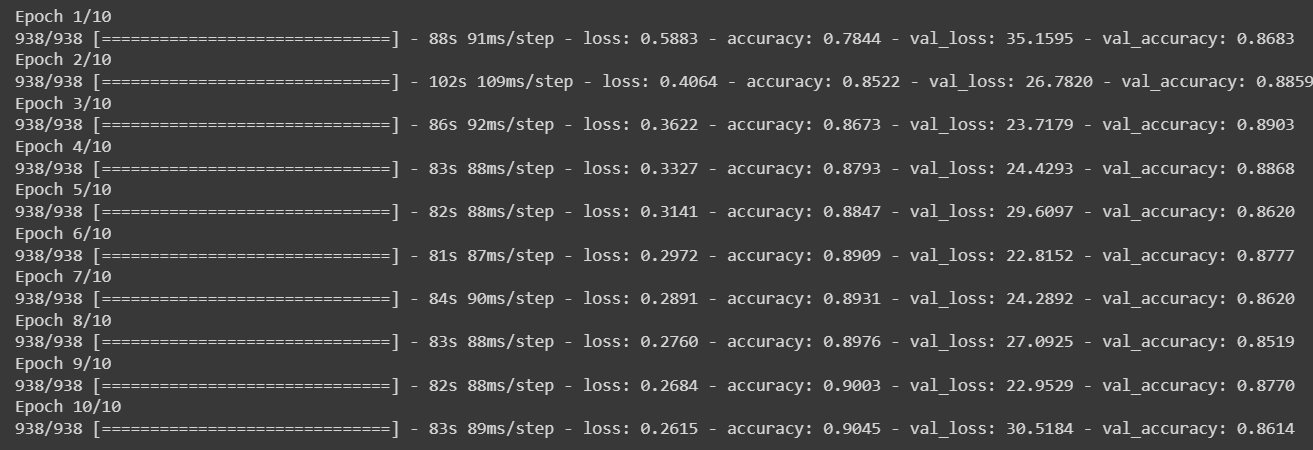

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 10ms/step - loss: 0.2620 - accuracy: 0.9050
Test Loss: 0.2620
Test Accuracy: 90.50%


In [34]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [35]:
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
combined_model = model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks = [reduce_lr])

Epoch 1/10
1172/1172 [==============================] - 100s 84ms/step - loss: 2.8657 - accuracy: 0.7517 - val_loss: 2.1842 - val_accuracy: 0.8629 - lr: 0.0010
Epoch 2/10
1172/1172 [==============================] - 92s 79ms/step - loss: 2.8045 - accuracy: 0.7301 - val_loss: 1.4643 - val_accuracy: 0.8012 - lr: 0.0010
Epoch 3/10
1172/1172 [==============================] - 91s 78ms/step - loss: 2.2149 - accuracy: 0.6791 - val_loss: 1.0746 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 4/10
1172/1172 [==============================] - 91s 77ms/step - loss: 1.7328 - accuracy: 0.6821 - val_loss: 1.1085 - val_accuracy: 0.8123 - lr: 0.0010
Epoch 5/10
1172/1172 [==============================] - 92s 79ms/step - loss: 1.5621 - accuracy: 0.6876 - val_loss: 1.1223 - val_accuracy: 0.7719 - lr: 0.0010
Epoch 6/10
1172/1172 [==============================] - 92s 78ms/step - loss: 1.3343 - accuracy: 0.7196 - val_loss: 0.8685 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 7/10
1172/1172 [=======================

In [38]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 4s 13ms/step - loss: 0.6300 - accuracy: 0.8844
Test Loss: 0.6300
Test Accuracy: 88.44%
